In [46]:
#importing all the libraries
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report

In [3]:
data=pd.read_csv("auto-mpg.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car name    398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
data.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [18]:
data.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [24]:
data.hp=data[data["hp"]!="?"]
data.hp.astype(int).head()

0    18
1    15
2    18
3    16
4    17
Name: hp, dtype: int32

In [25]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,18,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,15,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,18,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,16,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,17,3449,10.5,70,1,ford torino


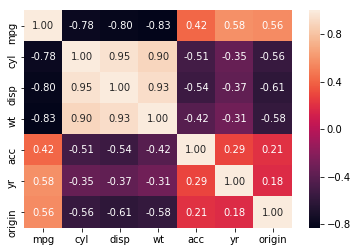

In [26]:
sns.heatmap(data.corr(),annot=True,fmt=".2f")

In [27]:
x=data.drop(["car name"],axis=1)
y=data.origin

In [28]:
from sklearn.model_selection import train_test_split


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=10)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
LR=LogisticRegression()
LR


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
LR=LR.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [39]:
y_pred=LR.predict(x_test)
y_pred

array([3, 3, 1, 3, 1, 3, 3, 1, 2, 3, 2, 2, 3, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 1, 1, 1, 2, 3, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 3, 3, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 3, 3, 3, 1, 3, 2, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 3, 1], dtype=int64)

In [42]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.96

In [45]:
CM=confusion_matrix(y_test,y_pred)
CM

array([[61,  0,  0],
       [ 2, 14,  2],
       [ 0,  0, 21]], dtype=int64)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        61
           2       1.00      0.78      0.88        18
           3       0.91      1.00      0.95        21

   micro avg       0.96      0.96      0.96       100
   macro avg       0.96      0.93      0.94       100
weighted avg       0.96      0.96      0.96       100

